In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_welfare = pd.read_spss('../Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()

In [3]:
welfare = welfare.rename(
    columns={'h14_g3': 'sex',
             'h14_g4': 'birth',
             'h14_g10': 'marriage_type',
             'h14_g11': 'religion',
             'p1402_8aq1': 'income',
             'h14_eco9': 'code_job',
             'h14_reg7': 'code_region'
             }
)

In [4]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

In [5]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)

In [6]:
# 직업 분류 코드 불러오기
list_job = pd.read_excel('../Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [7]:
welfare = welfare.merge(list_job, how='left', on = 'code_job')
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5,age,job
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,75.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,72.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN,78.0,전기공
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN,58.0,금속기계 부품 조립원
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN,57.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,53.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,28.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN,25.0,건설 및 광업 단순 종사자
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN,22.0,보건 의료 관련 종사자


In [8]:
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [9]:
job_income = welfare.dropna(subset=['job', 'income']) \
    .groupby('job', as_index=False) \
    .agg(mean_income=('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [10]:
top10 =job_income.sort_values('mean_income', ascending= False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [11]:
import matplotlib.pyplot as plot
plot.rcParams.update({'font.family' : 'Malgun Gothic'})

<AxesSubplot:xlabel='mean_income', ylabel='job'>

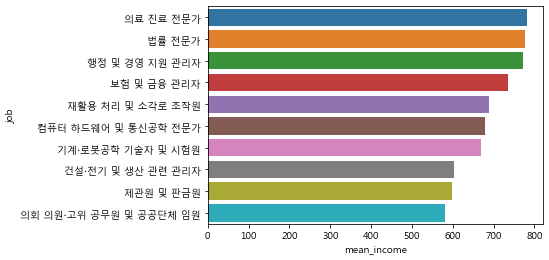

In [12]:
sns.barplot(data = top10, y = 'job', x = 'mean_income')